In [1]:
import torch
import torch.utils.data
from torchvision import datasets, transforms

import composer.models
from composer import Trainer
# Example algorithms to train with
from composer.algorithms import CutOut, LabelSmoothing


# Your custom model
class SimpleModel(composer.models.ComposerClassifier):
    """Your custom model."""

    def __init__(self, num_hidden: int, num_classes: int):
        module = torch.nn.Sequential(
            torch.nn.Flatten(start_dim=1),
            torch.nn.Linear(28 * 28, num_hidden),
            torch.nn.Linear(num_hidden, num_classes),
        )
        self.num_classes = num_classes
        super().__init__(module=module)


# Your custom train dataloader
train_dataloader = torch.utils.data.DataLoader(
    dataset=datasets.MNIST('.datasets/', train=True, transform=transforms.ToTensor(), download=True),
    drop_last=False,
    shuffle=True,
    batch_size=256,
)

# Your custom eval dataloader
eval_dataloader = torch.utils.data.DataLoader(
    dataset=datasets.MNIST('.datasets/', train=False, transform=transforms.ToTensor()),
    drop_last=False,
    shuffle=False,
    batch_size=256,
)

# Initialize Trainer with custom model, custom train and eval datasets, and algorithms to train with
trainer = Trainer(model=SimpleModel(num_hidden=128, num_classes=10),
                  train_dataloader=train_dataloader,
                  eval_dataloader=eval_dataloader,
                  max_duration='3ep',
                  algorithms=[CutOut(num_holes=1, length=0.5), LabelSmoothing(0.1)])

# trainer.fit()


/Users/austin/code/composer/composer/trainer/trainer.py:776: UserWarning: No optimizer was specified. Defaulting to DecoupledSGDW(lr=0.1)
  warnings.warn(('No optimizer was specified. Defaulting to '


In [2]:
def adjust_lr(optimizer, lr):
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr


def adjust_momentum(optimizer, momentum):
    for param_group in optimizer.param_groups:
        param_group['momentum'] = momentum
        
        
def get_lr(optimizer):
    return optimizer.param_groups[0]['lr']


def get_momentum(optimizer):
    return optimizer.param_groups[0].get('momentum')


In [3]:
from composer import Callback

In [4]:
state = trainer.state

In [5]:
state.timestamp

Timestamp(epoch=0, batch=0, sample=0, token=0, batch_in_epoch=0, sample_in_epoch=0, token_in_epoch=0, total_wct=datetime.timedelta(0), epoch_wct=datetime.timedelta(0), batch_wct=datetime.timedelta(0))

In [6]:
class ScheduleAnything(Callback):
    
    def __init__(self, state, function):
        pass

In [7]:
from composer.optim import LinearWithWarmupScheduler

In [8]:
scheduler = LinearWithWarmupScheduler(t_warmup="10ba", t_max='100ba')

In [9]:
def plot_lr(scheduler, state, num_batches=100):
    lrs = []
    for batch in range(num_batches):
        lrs.append(scheduler(state))
        state.timestamp = state.timestamp.to_next_batch()
    return lrs

In [10]:
lrs = plot_lr(scheduler, state)

In [11]:
import matplotlib.pyplot as plt

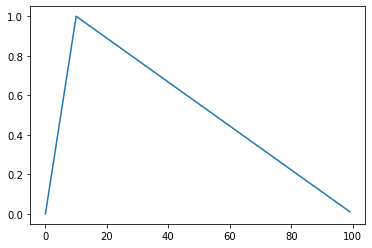

In [12]:
plt.plot(lrs)

In [14]:
from mmdet.datasets import CocoDataset

In [ ]:
dataset = CocoDataset(ann_file='../mmdetection/data/coco/train2017.zip')

In [ ]:
!ls ..

In [142]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector

In [132]:
build_dataset(data)

NameError: name 'data' is not defined

In [134]:
from mmcv import Config

In [138]:
from mmdet.utils import replace_cfg_vals, update_data_root

In [223]:
config = Config.fromfile('../mmdetection/configs/yolox/yolox_s_8x8_300e_coco.py')

In [224]:
config

Config (path: ../mmdetection/configs/yolox/yolox_s_8x8_300e_coco.py): {'optimizer': {'type': 'SGD', 'lr': 0.01, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'paramwise_cfg': {'norm_decay_mult': 0.0, 'bias_decay_mult': 0.0}}, 'optimizer_config': {'grad_clip': None}, 'lr_config': {'policy': 'YOLOX', 'warmup': 'exp', 'by_epoch': False, 'warmup_by_epoch': True, 'warmup_ratio': 1, 'warmup_iters': 5, 'num_last_epochs': 15, 'min_lr_ratio': 0.05}, 'runner': {'type': 'EpochBasedRunner', 'max_epochs': 300}, 'checkpoint_config': {'interval': 10}, 'log_config': {'interval': 50, 'hooks': [{'type': 'TextLoggerHook'}]}, 'custom_hooks': [{'type': 'YOLOXModeSwitchHook', 'num_last_epochs': 15, 'priority': 48}, {'type': 'SyncNormHook', 'num_last_epochs': 15, 'interval': 10, 'priority': 48}, {'type': 'ExpMomentumEMAHook', 'resume_from': None, 'momentum': 0.0001, 'priority': 49}], 'dist_params': {'backend': 'nccl'}, 'log_level': 'INFO', 'load_from': None, 'resume_from': None, 'workflow': [('t

In [232]:
config.get('test_cfg')

In [233]:
config.model

{'type': 'YOLOX',
 'input_size': (640, 640),
 'random_size_range': (15, 25),
 'random_size_interval': 10,
 'backbone': {'type': 'CSPDarknet',
  'deepen_factor': 0.33,
  'widen_factor': 0.5},
 'neck': {'type': 'YOLOXPAFPN',
  'in_channels': [128, 256, 512],
  'out_channels': 128,
  'num_csp_blocks': 1},
 'bbox_head': {'type': 'YOLOXHead',
  'num_classes': 80,
  'in_channels': 128,
  'feat_channels': 128},
 'train_cfg': {'assigner': {'type': 'SimOTAAssigner', 'center_radius': 2.5}},
 'test_cfg': {'score_thr': 0.01,
  'nms': {'type': 'nms', 'iou_threshold': 0.65}}}

In [234]:
model = build_detector(
    config.model,
    train_cfg=config.get('train_cfg'),
    test_cfg=config.get('test_cfg'))
model.init_weights()

2022-07-06 00:53:42,389 - mmcv - INFO - initialize CSPDarknet with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-07-06 00:53:42,411 - mmcv - INFO - initialize YOLOXPAFPN with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-07-06 00:53:42,427 - mmcv - INFO - initialize YOLOXHead with init_cfg {'type': 'Kaiming', 'layer': 'Conv2d', 'a': 2.23606797749979, 'distribution': 'uniform', 'mode': 'fan_in', 'nonlinearity': 'leaky_relu'}
2022-07-06 00:53:42,438 - mmcv - INFO - 
backbone.stem.conv.conv.weight - torch.Size([32, 12, 3, 3]): 
KaimingInit: a=2.23606797749979, mode=fan_in, nonlinearity=leaky_relu, distribution =uniform, bias=0 
 
2022-07-06 00:53:42,438 - mmcv - INFO - 
backbone.stem.conv.bn.weight - torch.Size([32]): 
The value is the same before and after calling `init_weights` of

In [237]:
import mmdet

In [243]:
type(model)

mmdet.models.detectors.yolox.YOLOX

In [244]:
isinstance(model, mmdet.models.detectors.BaseDetector)

True

In [245]:
config.model

{'type': 'YOLOX',
 'input_size': (640, 640),
 'random_size_range': (15, 25),
 'random_size_interval': 10,
 'backbone': {'type': 'CSPDarknet',
  'deepen_factor': 0.33,
  'widen_factor': 0.5},
 'neck': {'type': 'YOLOXPAFPN',
  'in_channels': [128, 256, 512],
  'out_channels': 128,
  'num_csp_blocks': 1},
 'bbox_head': {'type': 'YOLOXHead',
  'num_classes': 80,
  'in_channels': 128,
  'feat_channels': 128,
  'train_cfg': {'assigner': {'type': 'SimOTAAssigner', 'center_radius': 2.5}},
  'test_cfg': {'score_thr': 0.01,
   'nms': {'type': 'nms', 'iou_threshold': 0.65}}},
 'train_cfg': {'assigner': {'type': 'SimOTAAssigner', 'center_radius': 2.5}},
 'test_cfg': {'score_thr': 0.01,
  'nms': {'type': 'nms', 'iou_threshold': 0.65}}}

In [160]:
!ls ../mmdetection/data/coco

annotations_trainval2017.zip tmpwe0qqkmy
test2017.zip                 train2017.zip
tmp79d99qgo                  val2017.zip
tmps_vm3dc2


In [165]:
config.data.train

{'type': 'MultiImageMixDataset',
 'dataset': {'type': 'CocoDataset',
  'ann_file': '../mmdetection/data/coco/annotations/instances_train2017.json',
  'img_prefix': '../mmdetection/data/coco/train2017',
  'pipeline': [{'type': 'LoadImageFromFile'},
   {'type': 'LoadAnnotations', 'with_bbox': True}],
  'filter_empty_gt': False},
 'pipeline': [{'type': 'Mosaic', 'img_scale': (640, 640), 'pad_val': 114.0},
  {'type': 'RandomAffine',
   'scaling_ratio_range': (0.5, 1.5),
   'border': (-320, -320)},
  {'type': 'YOLOXHSVRandomAug'},
  {'type': 'RandomFlip', 'flip_ratio': 0.5},
  {'type': 'Resize', 'img_scale': (640, 640), 'keep_ratio': True},
  {'type': 'Pad',
   'pad_to_square': True,
   'pad_val': {'img': (114.0, 114.0, 114.0)}},
  {'type': 'FilterAnnotations', 'min_gt_bbox_wh': (1, 1), 'keep_empty': False},
  {'type': 'DefaultFormatBundle'},
  {'type': 'Collect', 'keys': ['img', 'gt_bboxes', 'gt_labels']}]}

In [166]:
config.data.train.dataset.ann_file = '../mmdetection/data/coco/annotations/instances_train2017.json'
config.data.train.dataset.img_prefix = '../mmdetection/data/coco/train2017'

In [210]:
config.data.train.pipeline

[{'type': 'Mosaic', 'img_scale': (640, 640), 'pad_val': 114.0},
 {'type': 'RandomAffine',
  'scaling_ratio_range': (0.5, 1.5),
  'border': (-320, -320)},
 {'type': 'YOLOXHSVRandomAug'},
 {'type': 'RandomFlip', 'flip_ratio': 0.5},
 {'type': 'Resize', 'img_scale': (640, 640), 'keep_ratio': True},
 {'type': 'Pad',
  'pad_to_square': True,
  'pad_val': {'img': (114.0, 114.0, 114.0)}},
 {'type': 'FilterAnnotations', 'min_gt_bbox_wh': (1, 1), 'keep_empty': False},
 {'type': 'DefaultFormatBundle'},
 {'type': 'Collect', 'keys': ['img', 'gt_bboxes', 'gt_labels']}]

In [163]:
dataset = build_dataset(config.data.train)

loading annotations into memory...
Done (t=13.97s)
creating index...
index created!


In [178]:
model(dataset[0])

TypeError: forward() missing 1 required positional argument: 'img_metas'

In [187]:
from torch.utils.data import DataLoader
from mmcv.parallel import collate

In [190]:
loader = DataLoader(dataset, batch_size=4, collate_fn=collate)

In [191]:
batch = next(iter(loader))

In [193]:
model(**batch)

TypeError: 'DataContainer' object is not subscriptable

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


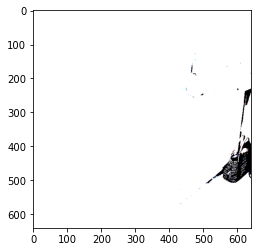

In [209]:
plt.imshow(dataset[5]['img'].data.permute(1, 2, 0))

In [196]:
collate??

Signature: collate(batch, samples_per_gpu=1)
Source:   
def collate(batch, samples_per_gpu=1):
    """Puts each data field into a tensor/DataContainer with outer dimension
    batch size.

    Extend default_collate to add support for
    :type:`~mmcv.parallel.DataContainer`. There are 3 cases.

    1. cpu_only = True, e.g., meta data
    2. cpu_only = False, stack = True, e.g., images tensors
    3. cpu_only = False, stack = False, e.g., gt bboxes
    """

    if not isinstance(batch, Sequence):
        raise TypeError(f'{batch.dtype} is not supported.')

    if isinstance(batch[0], DataContainer):
        stacked = []
        if batch[0].cpu_only:
            for i in range(0, len(batch), samples_per_gpu):
                stacked.append(
                    [sample.data for sample in batch[i:i + samples_per_gpu]])
            return DataContainer(
                stacked, batch[0].stack, batch[0].padding_value, cpu_only=True)
        elif batch[0].stack:
            for i in range(0,

In [181]:
dict(config)

{'optimizer': {'type': 'SGD',
  'lr': 0.01,
  'momentum': 0.9,
  'weight_decay': 0.0005,
  'nesterov': True,
  'paramwise_cfg': {'norm_decay_mult': 0.0, 'bias_decay_mult': 0.0}},
 'optimizer_config': {'grad_clip': None},
 'lr_config': {'policy': 'YOLOX',
  'warmup': 'exp',
  'by_epoch': False,
  'warmup_by_epoch': True,
  'warmup_ratio': 1,
  'warmup_iters': 5,
  'num_last_epochs': 15,
  'min_lr_ratio': 0.05},
 'runner': {'type': 'EpochBasedRunner', 'max_epochs': 300},
 'checkpoint_config': {'interval': 10},
 'log_config': {'interval': 50, 'hooks': [{'type': 'TextLoggerHook'}]},
 'custom_hooks': [{'type': 'YOLOXModeSwitchHook',
   'num_last_epochs': 15,
   'priority': 48},
  {'type': 'SyncNormHook',
   'num_last_epochs': 15,
   'interval': 10,
   'priority': 48},
  {'type': 'ExpMomentumEMAHook',
   'resume_from': None,
   'momentum': 0.0001,
   'priority': 49}],
 'dist_params': {'backend': 'nccl'},
 'log_level': 'INFO',
 'load_from': None,
 'resume_from': None,
 'workflow': [('train', 

In [213]:
b = dataset[0]

In [217]:
batch

{'img_metas': DataContainer([[{'filename': '../mmdetection/data/coco/train2017/000000391895.jpg', 'ori_filename': '000000391895.jpg', 'ori_shape': (360, 640, 3), 'img_shape': (640, 640, 3), 'pad_shape': (640, 640, 3), 'scale_factor': array([1., 1., 1., 1.], dtype=float32), 'flip': True, 'flip_direction': 'horizontal', 'img_norm_cfg': {'mean': array([0., 0., 0.], dtype=float32), 'std': array([1., 1., 1.], dtype=float32), 'to_rgb': False}}], [{'filename': '../mmdetection/data/coco/train2017/000000522418.jpg', 'ori_filename': '000000522418.jpg', 'ori_shape': (480, 640, 3), 'img_shape': (640, 640, 3), 'pad_shape': (640, 640, 3), 'scale_factor': array([1., 1., 1., 1.], dtype=float32), 'flip': True, 'flip_direction': 'horizontal', 'img_norm_cfg': {'mean': array([0., 0., 0.], dtype=float32), 'std': array([1., 1., 1.], dtype=float32), 'to_rgb': False}}], [{'filename': '../mmdetection/data/coco/train2017/000000184613.jpg', 'ori_filename': '000000184613.jpg', 'ori_shape': (336, 500, 3), 'img_sha

In [216]:
model(**batch)

TypeError: 'DataContainer' object is not subscriptable

In [212]:
model.train_step??

Signature: model.train_step(data, optimizer)
Docstring:
The iteration step during training.

This method defines an iteration step during training, except for the
back propagation and optimizer updating, which are done in an optimizer
hook. Note that in some complicated cases or models, the whole process
including back propagation and optimizer updating is also defined in
this method, such as GAN.

Args:
    data (dict): The output of dataloader.
    optimizer (:obj:`torch.optim.Optimizer` | dict): The optimizer of
        runner is passed to ``train_step()``. This argument is unused
        and reserved.

Returns:
    dict: It should contain at least 3 keys: ``loss``, ``log_vars``,                 ``num_samples``.

        - ``loss`` is a tensor for back propagation, which can be a
          weighted sum of multiple losses.
        - ``log_vars`` contains all the variables to be sent to the
          logger.
        - ``num_samples`` indicates the batch size (when the model is
       

In [218]:
import mmcv

In [219]:
mmcv.__version__

'1.5.2'

In [220]:
import torch

In [222]:
torch.__version__

'1.10.1'